In [30]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import re

In [31]:
# set parameters
np.random.seed(0)
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
data_dir = "C:/Users/Filip/Desktop/PW/2 semestr/Deep Learning/pro1"

batch_size = 64
epochs = 25

steps_per_epoch = 90000
steps_per_epoch = min(steps_per_epoch, 90000/batch_size)

In [32]:
# create generators for the training and test sets

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    
)
train_generator = datagen.flow_from_directory(
    data_dir + "/train",
    target_size=(32, 32),  # Resize images to this size
    batch_size=64,  # Number of images to load at each iteration
    class_mode="categorical",
)  # Type of classification ('binary' or 'categorical')

test_generator = datagen.flow_from_directory(
    data_dir + "/test",
    target_size=(32, 32),
    batch_size=64,
    class_mode="categorical",
)

Found 90000 images belonging to 10 classes.
Found 90000 images belonging to 10 classes.


In [33]:
import numpy as np

def mixup_data(x, y, alpha=0.1):
    """
    Applies the Mixup augmentation to a batch of images and labels.
    Args:
        x (np.array): Batch of images.
        y (np.array): Batch of labels.
        alpha (float): Mixup interpolation coefficient.
    Returns:
        Mixed images and labels.
    """
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y


In [34]:
def train_generator_with_mixup(train_generator, alpha=0.2):
    """
    Generator that applies Mixup augmentation to each batch.
    Args:
        train_generator: Original training generator.
        alpha (float): Mixup interpolation coefficient.
    """
    while True:
        x, y = next(train_generator)
        x, y = mixup_data(x, y, alpha)
        yield x, y


In [37]:
mixup_generator = train_generator_with_mixup(train_generator, alpha=0.1)

In [38]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [39]:
# fit model
history_1 = model.fit(
    mixup_generator,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 124s 88ms/step - loss: 2.7612 - accuracy: 0.2234 - val_loss: 1.7633 - val_accuracy: 0.3491
Epoch 2/25
1406/1406 [==============================] - 60s 43ms/step - loss: 2.0282 - accuracy: 0.3033 - val_loss: 1.6063 - val_accuracy: 0.4034
Epoch 3/25
1406/1406 [==============================] - 60s 42ms/step - loss: 1.8397 - accuracy: 0.3594 - val_loss: 1.5307 - val_accuracy: 0.4419
Epoch 4/25
1406/1406 [==============================] - 57s 40ms/step - loss: 1.7251 - accuracy: 0.3976 - val_loss: 1.4754 - val_accuracy: 0.4598
Epoch 5/25
1406/1406 [==============================] - 57s 41ms/step - loss: 1.6349 - accuracy: 0.4341 - val_loss: 1.4057 - val_accuracy: 0.4998
Epoch 6/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.5691 - accuracy: 0.4649 - val_loss: 1.3629 - val_accuracy: 0.5160
Epoch 7/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.4912 - accuracy: 0.4922 - val_loss: 1.3190 

In [40]:
mixup_generator2 = train_generator_with_mixup(train_generator, alpha=0.2)

In [41]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [42]:
# fit model
history_2 = model.fit(
    mixup_generator2,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.8124 - accuracy: 0.2188 - val_loss: 1.7454 - val_accuracy: 0.3594
Epoch 2/25
1406/1406 [==============================] - 55s 39ms/step - loss: 2.1136 - accuracy: 0.2911 - val_loss: 1.7085 - val_accuracy: 0.3815
Epoch 3/25
1406/1406 [==============================] - 57s 40ms/step - loss: 1.9279 - accuracy: 0.3414 - val_loss: 1.5977 - val_accuracy: 0.4177
Epoch 4/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.8009 - accuracy: 0.3838 - val_loss: 1.5011 - val_accuracy: 0.4626
Epoch 5/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.7064 - accuracy: 0.4213 - val_loss: 1.4165 - val_accuracy: 0.4888
Epoch 6/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.6457 - accuracy: 0.4478 - val_loss: 1.3663 - val_accuracy: 0.5174
Epoch 7/25
1406/1406 [==============================] - 57s 40ms/step - loss: 1.5814 - accuracy: 0.4802 - val_loss: 1.3403 -

In [43]:
mixup_generator3 = train_generator_with_mixup(train_generator, alpha=0.3)

In [44]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [45]:
# fit model
history_3 = model.fit(
    mixup_generator3,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 56s 39ms/step - loss: 2.8058 - accuracy: 0.2160 - val_loss: 1.7689 - val_accuracy: 0.3505
Epoch 2/25
1406/1406 [==============================] - 55s 39ms/step - loss: 2.1313 - accuracy: 0.2848 - val_loss: 1.6417 - val_accuracy: 0.4072
Epoch 3/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.9562 - accuracy: 0.3354 - val_loss: 1.6143 - val_accuracy: 0.4267
Epoch 4/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.8397 - accuracy: 0.3790 - val_loss: 1.5547 - val_accuracy: 0.4660
Epoch 5/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.7462 - accuracy: 0.4163 - val_loss: 1.4782 - val_accuracy: 0.4710
Epoch 6/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.6943 - accuracy: 0.4415 - val_loss: 1.4062 - val_accuracy: 0.5159
Epoch 7/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.6311 - accuracy: 0.4699 - val_loss: 1.3539 -

In [46]:
mixup_generator4 = train_generator_with_mixup(train_generator, alpha=0.4)

In [47]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [48]:
# fit model
history_4 = model.fit(
    mixup_generator4,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 57s 40ms/step - loss: 2.8475 - accuracy: 0.2061 - val_loss: 1.8322 - val_accuracy: 0.3211
Epoch 2/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.2013 - accuracy: 0.2676 - val_loss: 1.7149 - val_accuracy: 0.3783
Epoch 3/25
1406/1406 [==============================] - 57s 40ms/step - loss: 2.0027 - accuracy: 0.3208 - val_loss: 1.6508 - val_accuracy: 0.4160
Epoch 4/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.8964 - accuracy: 0.3635 - val_loss: 1.7331 - val_accuracy: 0.3884
Epoch 5/25
1406/1406 [==============================] - 57s 41ms/step - loss: 1.8020 - accuracy: 0.4006 - val_loss: 1.5678 - val_accuracy: 0.4448
Epoch 6/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.7359 - accuracy: 0.4329 - val_loss: 1.4502 - val_accuracy: 0.4962
Epoch 7/25
1406/1406 [==============================] - 57s 41ms/step - loss: 1.6910 - accuracy: 0.4593 - val_loss: 1.5469 -

In [49]:
mixup_generator5 = train_generator_with_mixup(train_generator, alpha=0.5)

In [50]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [51]:
# fit model
history_5 = model.fit(
    mixup_generator5,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 57s 40ms/step - loss: 2.8661 - accuracy: 0.1986 - val_loss: 1.8009 - val_accuracy: 0.3356
Epoch 2/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.2234 - accuracy: 0.2594 - val_loss: 1.7498 - val_accuracy: 0.3615
Epoch 3/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.0592 - accuracy: 0.3037 - val_loss: 1.6941 - val_accuracy: 0.3833
Epoch 4/25
1406/1406 [==============================] - 57s 40ms/step - loss: 1.9312 - accuracy: 0.3514 - val_loss: 1.6872 - val_accuracy: 0.4014
Epoch 5/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.8643 - accuracy: 0.3814 - val_loss: 1.5362 - val_accuracy: 0.4643
Epoch 6/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.7895 - accuracy: 0.4171 - val_loss: 1.5515 - val_accuracy: 0.4691
Epoch 7/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.7353 - accuracy: 0.4440 - val_loss: 1.4233 -

In [52]:
mixup_generator6 = train_generator_with_mixup(train_generator, alpha=0.6)

In [53]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [54]:
# fit model
history_6 = model.fit(
    mixup_generator6,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 57s 40ms/step - loss: 2.9452 - accuracy: 0.1940 - val_loss: 1.8562 - val_accuracy: 0.3166
Epoch 2/25
1406/1406 [==============================] - 57s 40ms/step - loss: 2.2461 - accuracy: 0.2587 - val_loss: 1.7813 - val_accuracy: 0.3612
Epoch 3/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.0598 - accuracy: 0.3032 - val_loss: 1.6832 - val_accuracy: 0.4054
Epoch 4/25
1406/1406 [==============================] - 60s 43ms/step - loss: 1.9559 - accuracy: 0.3415 - val_loss: 1.6127 - val_accuracy: 0.4346
Epoch 5/25
1406/1406 [==============================] - 59s 42ms/step - loss: 1.8751 - accuracy: 0.3850 - val_loss: 1.5962 - val_accuracy: 0.4281
Epoch 6/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.8125 - accuracy: 0.4137 - val_loss: 1.4618 - val_accuracy: 0.4922
Epoch 7/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.7766 - accuracy: 0.4339 - val_loss: 1.4849 -

In [55]:
mixup_generator7 = train_generator_with_mixup(train_generator, alpha=0.7)

In [56]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [57]:
# fit model
history_7 = model.fit(
    mixup_generator7,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 56s 39ms/step - loss: 2.9536 - accuracy: 0.1911 - val_loss: 1.9113 - val_accuracy: 0.3014
Epoch 2/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.2442 - accuracy: 0.2492 - val_loss: 1.7919 - val_accuracy: 0.3466
Epoch 3/25
1406/1406 [==============================] - 55s 39ms/step - loss: 2.0595 - accuracy: 0.3008 - val_loss: 1.7427 - val_accuracy: 0.3719
Epoch 4/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.9726 - accuracy: 0.3351 - val_loss: 1.6413 - val_accuracy: 0.4210
Epoch 5/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.8875 - accuracy: 0.3776 - val_loss: 1.5909 - val_accuracy: 0.4348
Epoch 6/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.8448 - accuracy: 0.4021 - val_loss: 1.4779 - val_accuracy: 0.4871
Epoch 7/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.7932 - accuracy: 0.4262 - val_loss: 1.4565 -

In [58]:
mixup_generator8 = train_generator_with_mixup(train_generator, alpha=0.8)

In [59]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])


In [60]:
# fit model
history_8 = model.fit(
    mixup_generator8,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 55s 39ms/step - loss: 2.9627 - accuracy: 0.1943 - val_loss: 1.9441 - val_accuracy: 0.3054
Epoch 2/25
1406/1406 [==============================] - 54s 39ms/step - loss: 2.2717 - accuracy: 0.2525 - val_loss: 1.7988 - val_accuracy: 0.3507
Epoch 3/25
1406/1406 [==============================] - 54s 39ms/step - loss: 2.0876 - accuracy: 0.3010 - val_loss: 1.7035 - val_accuracy: 0.3986
Epoch 4/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.9925 - accuracy: 0.3356 - val_loss: 1.6609 - val_accuracy: 0.4170
Epoch 5/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.9097 - accuracy: 0.3708 - val_loss: 1.6285 - val_accuracy: 0.4256
Epoch 6/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.8547 - accuracy: 0.4040 - val_loss: 1.5600 - val_accuracy: 0.4658
Epoch 7/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.8150 - accuracy: 0.4247 - val_loss: 1.5125 -

In [61]:
mixup_generator9 = train_generator_with_mixup(train_generator, alpha=0.9)

In [62]:
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.8),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [63]:
# fit model
history_9 = model.fit(
    mixup_generator9,
    epochs=25,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch
)

Epoch 1/25
1406/1406 [==============================] - 56s 39ms/step - loss: 2.9023 - accuracy: 0.1963 - val_loss: 1.8744 - val_accuracy: 0.3218
Epoch 2/25
1406/1406 [==============================] - 55s 39ms/step - loss: 2.2499 - accuracy: 0.2596 - val_loss: 1.7660 - val_accuracy: 0.3589
Epoch 3/25
1406/1406 [==============================] - 56s 40ms/step - loss: 2.0851 - accuracy: 0.3048 - val_loss: 1.7390 - val_accuracy: 0.3676
Epoch 4/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.9801 - accuracy: 0.3410 - val_loss: 1.6575 - val_accuracy: 0.4059
Epoch 5/25
1406/1406 [==============================] - 56s 40ms/step - loss: 1.9096 - accuracy: 0.3728 - val_loss: 1.5917 - val_accuracy: 0.4443
Epoch 6/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.8557 - accuracy: 0.4027 - val_loss: 1.6263 - val_accuracy: 0.4301
Epoch 7/25
1406/1406 [==============================] - 55s 39ms/step - loss: 1.8235 - accuracy: 0.4238 - val_loss: 1.5532 -

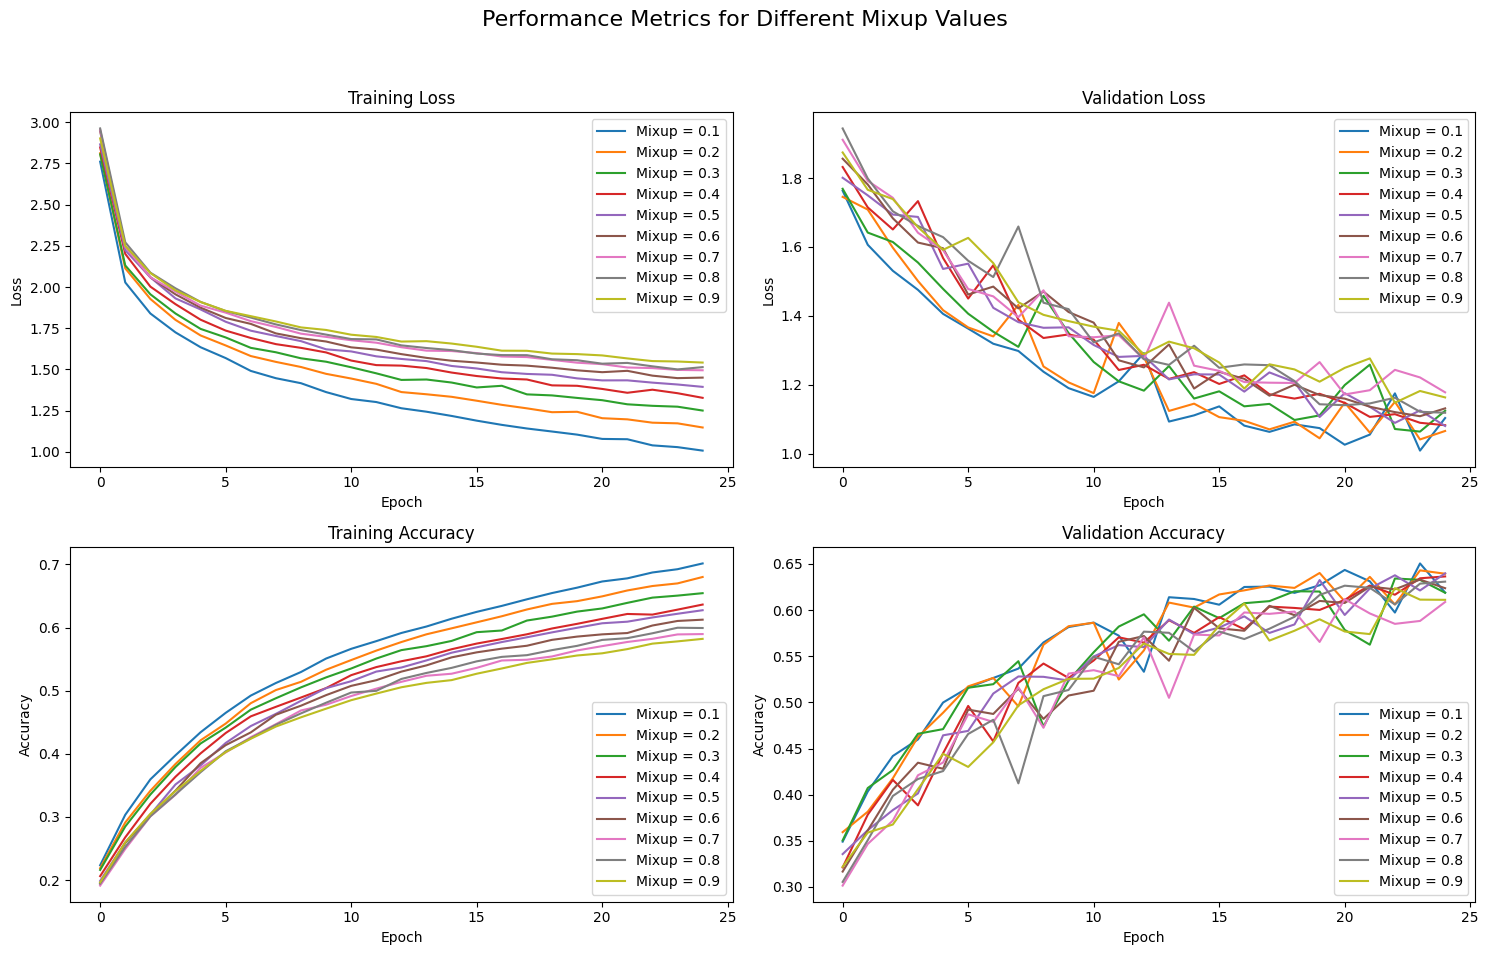

In [67]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plotting Training Loss
for i in range(1, 10):
    mixup = i / 10
    axs[0, 0].plot(eval(f"history_{i}.history['loss']"), label=f'Mixup = {mixup}')

axs[0, 0].set_title('Training Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# Plotting Validation Loss
for i in range(1, 10):
    mixup = i / 10
    axs[0, 1].plot(eval(f"history_{i}.history['val_loss']"), label=f'Mixup = {mixup}')

axs[0, 1].set_title('Validation Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()

# Plotting Training Accuracy
for i in range(1, 10):
    mixup = i / 10
    axs[1, 0].plot(eval(f"history_{i}.history['accuracy']"), label=f'Mixup = {mixup}')

axs[1, 0].set_title('Training Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Plotting Validation Accuracy
for i in range(1, 10):
    mixup = i / 10
    axs[1, 1].plot(eval(f"history_{i}.history['val_accuracy']"), label=f'Mixup = {mixup}')

axs[1, 1].set_title('Validation Accuracy')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].legend()

# Adjust layout and set an overall title
fig.suptitle('Performance Metrics for Different Mixup Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()